In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("D:\Labs\performance.csv",sep=",")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
willOneHotEncode = ["gender"]
for item in willOneHotEncode:
    df = pd.concat([df,pd.get_dummies(df[item],prefix=item)],axis=1)
    df = df.drop(columns=[item])
df.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1


In [6]:
class_nums = {"class":   {"A": 0, "B": 1, "C":2, "D":3,}}
df = df.replace(class_nums)
df.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,0,1


In [7]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df))
scaledColums.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,0.366863,0.633137,0.368044,0.268437,0.504461,0.647934,0.524310,0.168947,0.497140,0.627491,0.500062,0.367804,0.632196
std,0.316875,0.122479,0.106884,0.096245,0.068771,0.073204,0.150707,0.035532,0.178459,0.131578,0.372703,0.482226,0.482226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093023,0.543605,0.285331,0.198939,0.454545,0.597015,0.390071,0.150840,0.375000,0.534653,0.333333,0.000000,0.000000
50%,0.255814,0.642442,0.367621,0.262599,0.505762,0.646766,0.537589,0.173109,0.512500,0.636964,0.666667,0.000000,1.000000
75%,0.627907,0.723837,0.438283,0.331565,0.550576,0.701493,0.641135,0.192017,0.625000,0.729373,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

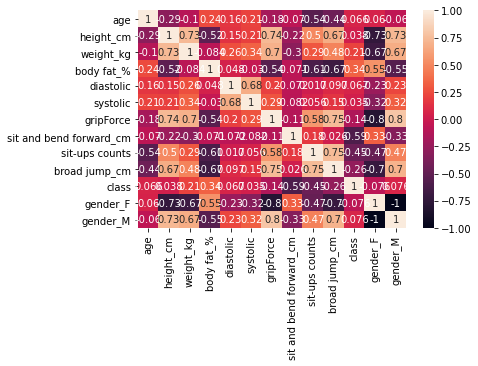

In [8]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

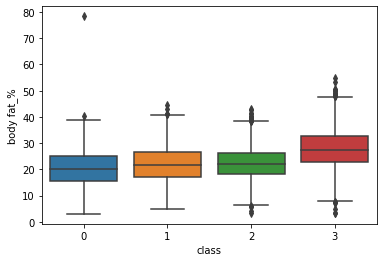

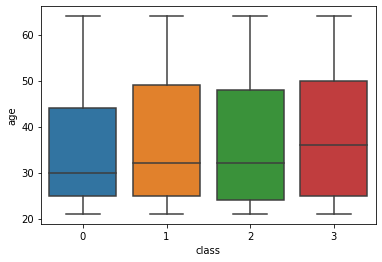

In [9]:
continuousColumns = ["body fat_%","age"]
for item  in continuousColumns:
    sns.boxplot(x="class", y=item, data=df)
    plt.show()

<AxesSubplot:title={'center':'body fat_%'}, xlabel='body fat_%', ylabel='Count'>

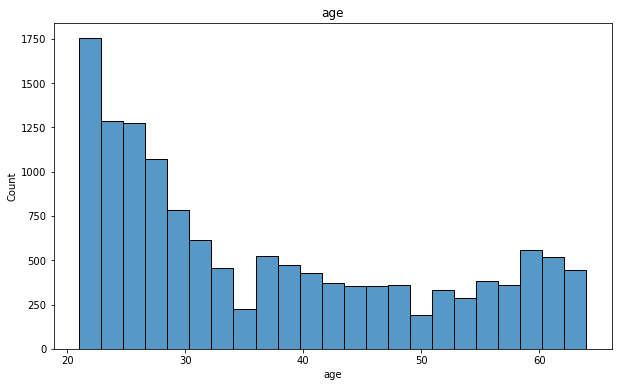

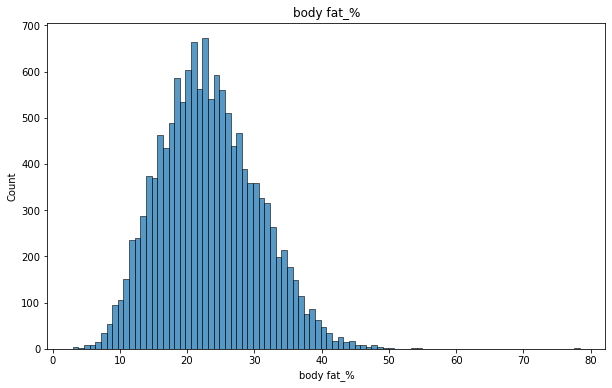

In [10]:
plt.figure(2, figsize=(10,6))
plt.title("age")
sns.histplot(df['age'])

plt.figure(3, figsize=(10,6)) 
plt.title("body fat_%")
sns.histplot(df['body fat_%'])

In [11]:
target = ["class"]
features = df.columns.drop(target)
train,test = train_test_split(df,test_size = 0.33)
xTrain = train[features]
yTrain = train[target]
xTest  = test[features]
yTest = test[target]

In [12]:
knnModel = KNeighborsClassifier(n_neighbors=5) 
knnModel.fit(xTrain,yTrain.values.ravel())

KNeighborsClassifier()

In [13]:
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)

0.5613122171945701

In [14]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.56      0.78      0.66      1090
           1       0.39      0.43      0.41      1099
           2       0.51      0.43      0.47      1098
           3       0.89      0.60      0.72      1133

    accuracy                           0.56      4420
   macro avg       0.59      0.56      0.56      4420
weighted avg       0.59      0.56      0.56      4420



<AxesSubplot:>

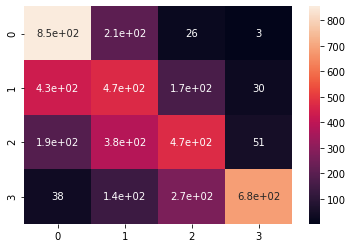

In [15]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [16]:
dTree = DecisionTreeClassifier()
dTree.fit(xTrain, yTrain)

DecisionTreeClassifier()

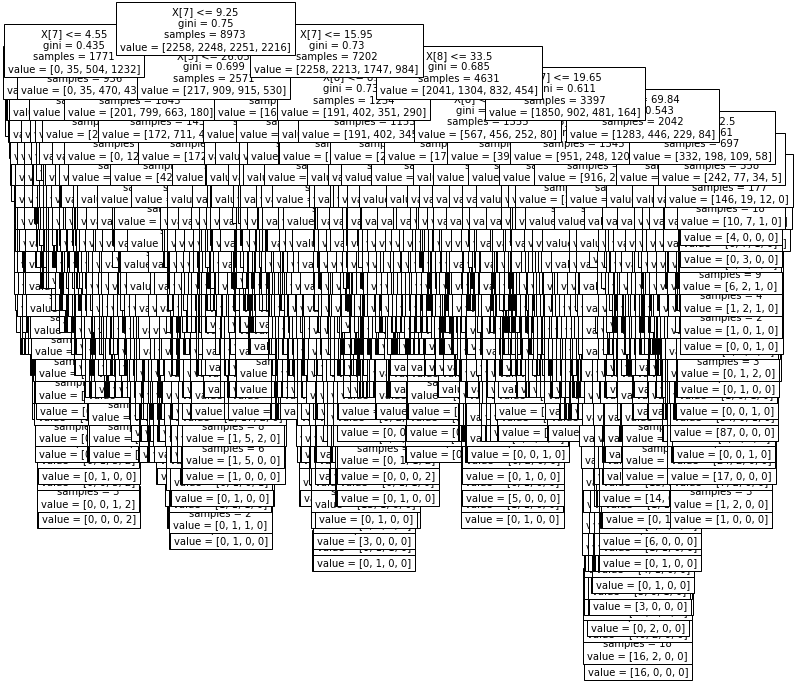

In [17]:
plt.figure(figsize=(12,12))
plot_tree(dTree, fontsize=10)
plt.show()

In [18]:
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1090
           1       0.50      0.51      0.51      1099
           2       0.59      0.56      0.57      1098
           3       0.78      0.80      0.79      1133

    accuracy                           0.64      4420
   macro avg       0.63      0.64      0.63      4420
weighted avg       0.64      0.64      0.64      4420



In [19]:
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)

0.6368778280542986

<AxesSubplot:>

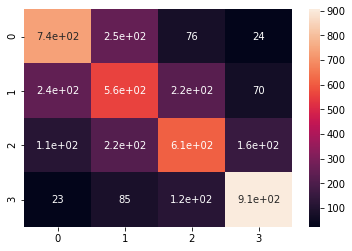

In [20]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [21]:
SVC_clsfr = SVC(C=1, gamma=0.01)
SVC_clsfr.fit(xTrain,yTrain.values.ravel())

SVC(C=1, gamma=0.01)

In [22]:
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)

0.6108597285067874

In [23]:
print(classification_report(yTest,yPred,zero_division=0))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1090
           1       0.50      0.44      0.47      1099
           2       0.56      0.51      0.53      1098
           3       0.67      0.83      0.74      1133

    accuracy                           0.61      4420
   macro avg       0.60      0.61      0.60      4420
weighted avg       0.60      0.61      0.60      4420



<AxesSubplot:>

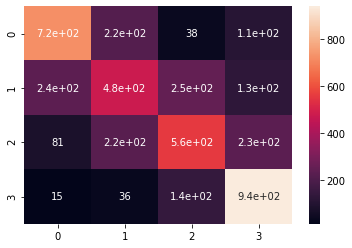

In [24]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [25]:
rForest = RandomForestClassifier()
rForest.fit(xTrain,yTrain.values.ravel())

RandomForestClassifier()

In [26]:
yPred= rForest.predict(xTest)
accuracy_score(yTest,yPred)

0.7346153846153847

In [27]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1090
           1       0.61      0.60      0.60      1099
           2       0.71      0.65      0.68      1098
           3       0.90      0.83      0.87      1133

    accuracy                           0.73      4420
   macro avg       0.74      0.73      0.73      4420
weighted avg       0.74      0.73      0.73      4420



<AxesSubplot:>

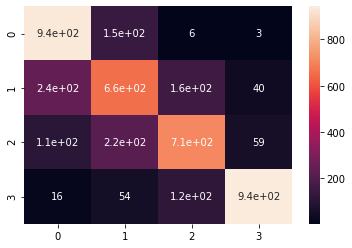

In [28]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [29]:
AdaB = AdaBoostClassifier()
AdaB.fit(xTrain,yTrain.values.ravel())

AdaBoostClassifier()

In [30]:
yPred= AdaB.predict(xTest)
accuracy_score(yTest,yPred)

0.601131221719457

In [31]:
print(classification_report(yTest,yPred,zero_division=0))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1090
           1       0.47      0.50      0.49      1099
           2       0.51      0.48      0.50      1098
           3       0.77      0.67      0.71      1133

    accuracy                           0.60      4420
   macro avg       0.60      0.60      0.60      4420
weighted avg       0.61      0.60      0.60      4420



<AxesSubplot:>

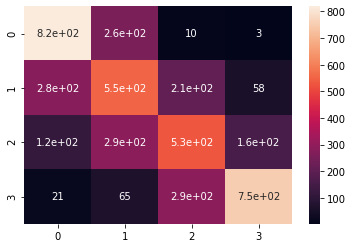

In [32]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [33]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
SVC_clsfr = SVC()
grid_search = GridSearchCV(SVC_clsfr, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [34]:
print("Accuracy", grid_search.best_score_) 
print("Parameters:\n", grid_search.best_estimator_)

Accuracy 0.6165601024276273
Parameters:
 SVC(C=1000, gamma=0.0001)


In [35]:
param_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,0.1]}
AdaB = AdaBoostClassifier()
grid_search=GridSearchCV(AdaB, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True,n_jobs=1)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [36]:
print("Accuracy", grid_search.best_score_) 
print("Parameters", grid_search.best_estimator_)

Accuracy 0.5298780836773442
Parameters AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)


In [37]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'max_features': [1, 2, 3, 4]}
dTree = DecisionTreeClassifier()
grid_search=GridSearchCV(dTree, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [38]:
print("Accuracy", grid_search.best_score_) 
print("Parameters", grid_search.best_estimator_)

Accuracy 0.45786281531905965
Parameters DecisionTreeClassifier(max_depth=10, max_features=4)


In [39]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'n_estimators': [50, 100, 150, 200]}
rForest = RandomForestClassifier()
grid_search=GridSearchCV(rForest, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [40]:
print("Accuracy", grid_search.best_score_) 
print("Parameters", grid_search.best_estimator_)

Accuracy 0.6477464069210427
Parameters RandomForestClassifier(max_depth=12, n_estimators=150)


In [41]:
param_grid ={'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
knnModel = KNeighborsClassifier() 
grid_search=GridSearchCV(knnModel, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [42]:
print("Accuracy", grid_search.best_score_) 
print("Parameters", grid_search.best_estimator_)

Accuracy 0.43641522369974084
Parameters KNeighborsClassifier(n_neighbors=15)
